Neste post segue anotações sobre o projeto guiado [Basic Image Classification with TensorFlow](https://www.coursera.org/projects/tensorflow-beginner-basic-image-classification) do Coursera. O meu certificado pode ser visualizado [aqui](https://www.coursera.org/account/accomplishments/verify/GD75SVXW9Q4U).

O conteúdo desta atividade de classificação é composto de:
1. Importar as bibliotecas;
2. Importar o conjunto de dados e dividi-los entre base treino e de teste;
3. Aplicar o processo de Hot Encoding nas classes de respostas;
4. Pre-processamento;
5. Criar o modelo de rede neural denso;
6. Treinar este modelo;
7. Aplicar a predição e imprimir alguns resultados.


## 1. Importar bibliotecas necessárias, incluindo o [TensorFlow](https://www.tensorflow.org/?hl=pt-br)

In [1]:
import tensorflow as tf
import numpy as np

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

#para o hot-encoding
from tensorflow.keras.utils import to_categorical

#para criar as camadas do modelo de rede neural
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#para plotar as imagens
from matplotlib import pyplot as plt
%matplotlib inline

2024-03-23 16:57:52.613035: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 16:57:52.668834: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 16:57:52.669873: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 16:57:53.577963: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using TensorFlow version 2.13.1


## 2: Importar o conjunto de dados e dividir entre base treino e de teste
Importar o conjunto [MNIST](https://en.wikipedia.org/wiki/MNIST_database)


In [2]:
# https://www.tensorflow.org/datasets/catalog/mnist?hl=pt-br
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

### Dimensões dos arrays importados 

In [3]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


### Plotar uma imagem presente no array

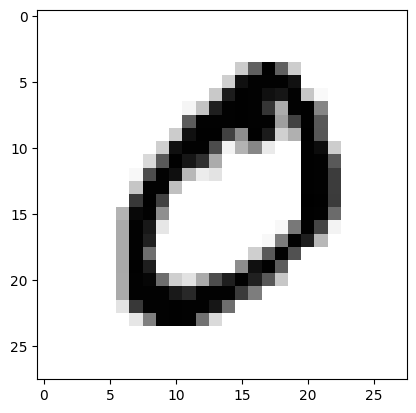

In [4]:
# Apresentando a imagem presente na posição 0
plt.imshow(x_train[1], cmap="binary")
plt.show()

### Mostrar o rótulo de treino da figura acima e todos os valores destes rótulos: 

In [5]:
# O valor da classe na posição 1
y_train[1]

0

In [6]:
# Os valores presentes na classe de treino
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## 3 - Aplicar o processo de Hot Encoding nas classes de respostas
Para que as classes de respostas possam passar pelo processo de treinamento e de testes, é necessario aplicar o processo de pré-processamento de hot encoding nas classes de respostas.

### Codificando os rótulos

In [7]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Conhecendo as dimensões das bases de dados codificadas

In [8]:
print("y_train_encoded shape", y_train_encoded.shape)
print("y_test_encoded shape", y_test_encoded.shape)

y_train_encoded shape (60000, 10)
y_test_encoded shape (10000, 10)


### Apresentando um rótulo codificado.

In [9]:
y_train_encoded[1] #valor 0

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 4 Pré-processamento.

### Transformar a matriz de 2 dimensões (28x28 pixels com valores de 0 a 255) em um uníco vetor de dimensão 784.

In [10]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print("x_train_reshaped_shape", x_train_reshaped.shape)
print("x_test_reshaped_shape", x_test_reshaped.shape)

x_train_reshaped_shape (60000, 784)
x_test_reshaped_shape (10000, 784)


### Apresentar os valores dos Pixeis:

In [11]:
print("valores encontrados na imagem:", set(x_train_reshaped[1]))

valores encontrados na imagem: {0, 6, 7, 10, 12, 19, 21, 25, 28, 29, 37, 38, 47, 48, 50, 51, 54, 56, 57, 60, 63, 71, 75, 76, 79, 84, 85, 86, 96, 112, 114, 121, 122, 128, 130, 131, 135, 141, 145, 146, 148, 159, 162, 163, 165, 167, 168, 173, 178, 179, 186, 189, 190, 195, 196, 198, 199, 202, 208, 215, 223, 224, 225, 227, 228, 229, 230, 233, 237, 238, 239, 240, 243, 246, 249, 252, 253, 255}


### Normalização estes dados

In [12]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped-x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped-x_mean) / (x_std + epsilon)

### Apresentando estes valores normalizados.

In [13]:
print("valores normalizados na imagem:", set(x_train_norm[1]))

valores normalizados na imagem: {0.2632332858605251, 1.5996639141274305, 2.7960875241949457, 2.6051688630139593, 2.7833596134495466, 2.5924409522685603, 2.465161844814569, 2.6178967737593584, 2.5415293092869637, 2.426978112578372, 1.7142151108360224, 2.668808416740955, 2.057868700961798, 1.421473163691843, 1.1287312165476637, 0.059586713934139515, 2.7451758812133495, 2.1087803439433945, 0.5432473222593053, 0.2250495536243278, -0.18224359022844336, 1.2305545025108566, 2.5033455770507667, 0.3014170180967224, 2.31242691586978, 1.676031378599825, -0.4240738943910262, 0.18686582138813052, -0.05496448277445237, -0.33497851917323257, -0.29679478693703526, 2.070596611707197, 2.706992148977152, 2.4142502018329726, 1.7778546645630178, 1.4342010744372422, 1.2432824132562557, 2.2233315406519862, 1.294194056237852, 0.6577985189678972, 1.9815012364894034, 1.0014521090936728, 1.6378476463636278, -0.27133896544623703, 0.7978055371672873, 0.4796077685323098, 0.5305194115139061, 0.6450706082224981, 2.47

## 5: Criando o modelo de rede neural densa.
### Modelo será composto de uma camada de entrada, uma camada interna oculta e uma camada de saída. Clique [aqui](https://www.deeplearningbook.com.br/funcao-de-ativacao/) conhecer mais sobre os tipos de funções de ativação.

In [14]:
model = Sequential([
    Dense(128, activation="relu",input_shape=(784,)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

2024-03-23 16:57:56.801547: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-23 16:57:56.802285: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Compilando o modelo

In [15]:
model.compile(
    optimizer="sgd",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)
 
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 6 - Treinando o modelo

### Treinar o modelo com o base de dados de treino normalizado e com o a base de classe de treino codificado.

In [16]:
model.fit(x_train_norm, y_train_encoded, epochs=2)

Epoch 1/2


2024-03-23 16:57:58.636487: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.3619 - accuracy: 0.8957
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1817 - accuracy: 0.9467


### Avaliar a performance do modelo na base de teste.

In [17]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print("Test set accuracy:", accuracy * 100)

2024-03-23 16:58:05.707163: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 1ms/step - loss: 0.1559 - accuracy: 0.9550
Test set accuracy: 95.49999833106995


## 7 - Predição

### Realizar a predição na base de teste normalizada

In [18]:
predit = model.predict(x_test_norm)
print("Shape of preds:", predit.shape)

  1/313 [..............................] - ETA: 27s

2024-03-23 16:58:06.404554: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step
Shape of preds: (10000, 10)


### Plotagem dos 16 primeiros valores da base de teste e uma comparação entre a resposta conhecida e a predição deste modelo.

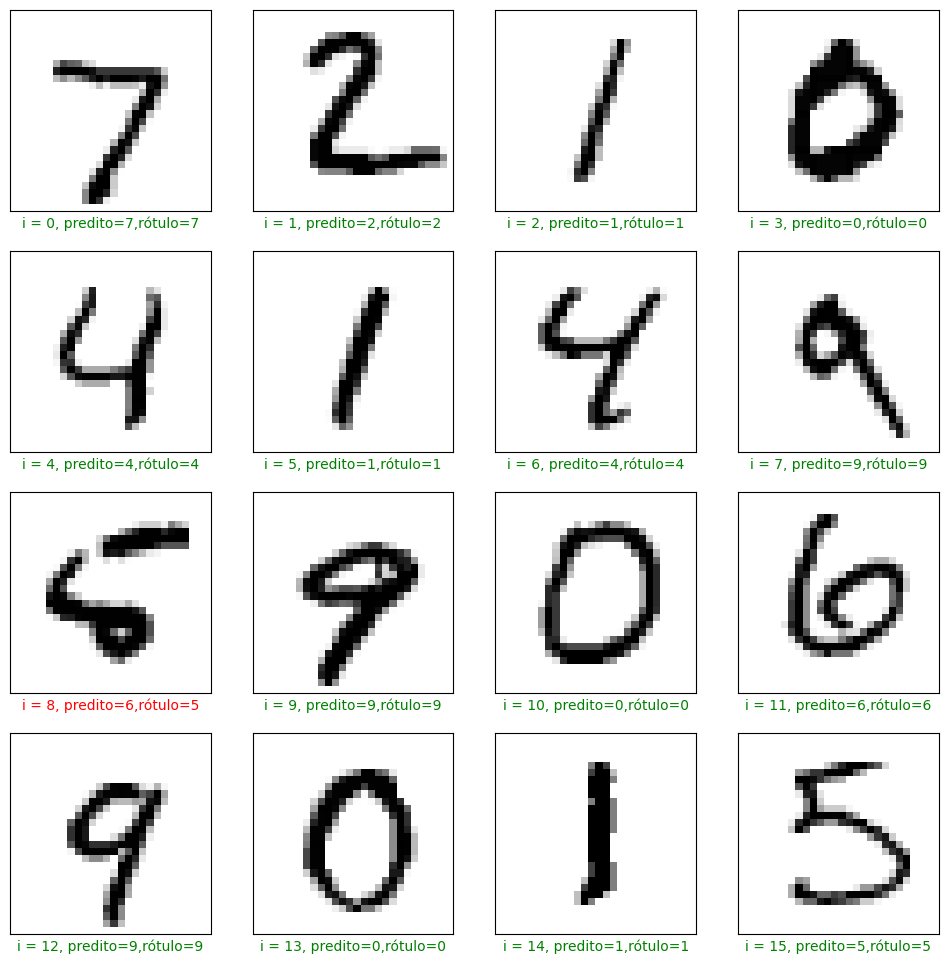

In [19]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(predit[start_index + i])
    value_test = y_test[start_index + i]
    
    col = "g"
    if pred != value_test:
        col = "r"
    
    plt.xlabel("i = {}, predito={},rótulo={}".format(start_index+i, pred, value_test), color = col)
    plt.imshow(x_test[start_index+i], cmap = "binary")
plt.show()

### Observa-se que nos 16 primeiros valores, apenas a imagem de indíce 8 foi predita de forma incorreta. O Modelo predisse o numero 6, mas o rótulo é o número 5.

## Conclusão: 
Este post apresenta um fluxo de trabalho para tarefas de classificação de imagens utilizando o TensorFlow. Seria possivel modificar a estrutura da rede neural, aumentar a quantidade de treino ou realizar um hypertunning nos parametros do modelo.